In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [6]:
car_data = pd.read_csv("Resource/Crash_information_(Last_5_Years).csv")
car_data.head()

,X,Y,OBJECTID,ACC_ID,ROAD_NO,ROAD_NAME,COMMON_ROAD_NAME,CWAY,SLK,INTERSECTION_NO,...,ACCIDENT_TYPE,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
0,115.792274,-32.029452,27585440,10231294,1190012,Preston Point Rd,Preston Point Rd,S,0.86,47160.0,...,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0
1,115.821106,-31.901343,27585441,10231300,H561,Hutton St on to Mitchell Fwy (Southbound),Hutton St on to Mitchell Fwy (Southbound),S,0.00,4347.0,...,Intersection,PDO Major,Rear End,NaN,0,0,0,0,2,0
2,115.970937,-32.066115,27585442,10231306,1040003,Spencer Rd,Spencer Rd,L,4.97,43773.0,...,Intersection,PDO Major,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
3,115.852685,-31.952160,27585443,10231312,1240111,Hay St,Hay St,S,2.92,NaN,...,Midblock,PDO Minor,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
4,115.949014,-31.906427,27585444,10231318,1110017,Palmerston St,Palmerston St,S,0.47,37514.0,...,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0


In [7]:
car_data.columns

Index(['X', 'Y', 'OBJECTID', 'ACC_ID', 'ROAD_NO', 'ROAD_NAME',
       'COMMON_ROAD_NAME', 'CWAY', 'SLK', 'INTERSECTION_NO',
       'INTERSECTION_DESC', 'LONGITUDE', 'LATITUDE', 'CRASH_DATE',
       'CRASH_TIME', 'ACCIDENT_TYPE', 'SEVERITY', 'EVENT_NATURE', 'EVENT_TYPE',
       'TOTAL_BIKE_INVOLVED', 'TOTAL_TRUCK_INVOLVED',
       'TOTAL_HEAVY_TRUCK_INVOLVED', 'TOTAL_MOTOR_CYCLE_INVOLVED',
       'TOTAL_OTHER_VEHICLES_INVOLVED', 'TOTAL_PEDESTRIANS_INVOLVED'],
      dtype='object')

In [ ]:
# look at data
car_data.describe()

In [17]:
# filter out data not needed
car_1 = car_data.drop(columns=["X","Y","OBJECTID","ROAD_NO","ROAD_NAME", "COMMON_ROAD_NAME", "CWAY", "SLK", "INTERSECTION_NO", "INTERSECTION_DESC"])

In [ ]:
# groupby year
car_1.groupby("CRASH_DATE")["TOTAL_PEDESTRIANS_INVOLVED"]
plt.bar(car_1.groupby("CRASH_DATE"), car_1["TOTAL_PEDESTRIANS_INVOLVED"])


In [46]:
# different types of crashes
pedest = (car_1["TOTAL_PEDESTRIANS_INVOLVED"]>0).sum()
vehicles = (car_1["TOTAL_OTHER_VEHICLES_INVOLVED"]>0).sum()
motocycles = (car_1["TOTAL_MOTOR_CYCLE_INVOLVED"]>0).sum()
trucks = (car_1["TOTAL_TRUCK_INVOLVED"]>0).sum()
heavy_trucks = (car_1["TOTAL_HEAVY_TRUCK_INVOLVED"]>0).sum()
bikes = (car_1["TOTAL_BIKE_INVOLVED"]>0).sum()
total = len(car_1)

2259
130005
5210
5070
2089
2869
136676


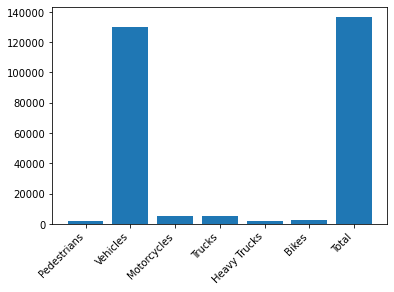

In [59]:
types = ["Pedestrians", "Vehicles", "Motorcycles", "Trucks", "Heavy Trucks", "Bikes", "Total"]
crash_types = [pedest, vehicles, motocycles, trucks, heavy_trucks, bikes, total]
x_axis = np.arange(len(crash_types))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, crash_types)
plt.xticks(tick_locations, types, rotation=45,horizontalalignment="right")
plt.show()

<BarContainer object of 136676 artists>

Error in callback <function flush_figures at 0x0000015DE0B08C80> (for post_execute):


KeyboardInterrupt: 

In [12]:
# filtered for pedestrians 
pedestrian = car_data[car_data["TOTAL_PEDESTRIANS_INVOLVED"]>0]
pedestrian

,X,Y,OBJECTID,ACC_ID,ROAD_NO,ROAD_NAME,COMMON_ROAD_NAME,CWAY,SLK,INTERSECTION_NO,...,ACCIDENT_TYPE,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
132,121.460072,-30.758825,27585572,10232359,H005,Great Eastern Hwy,Hannan St,S,590.32,16521.0,...,Intersection,PDO Major,Rear End,NaN,0,0,0,0,2,1
197,115.714737,-33.321952,27585637,10232904,2080202,Eaton Dr,Eaton Dr,L,0.30,99687.0,...,Intersection,PDO Major,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1
227,115.772579,-31.734973,27585667,10233140,1314102,Nottinghill St,Nottinghill St,S,0.38,NaN,...,Midblock,Fatal,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1
432,115.961555,-31.861525,27585872,10226903,H021,Reid Hwy,Reid Hwy,R,18.55,NaN,...,Midblock,Fatal,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1
464,116.007399,-32.075582,27585904,10227223,1040367,Clara St,Clara St,S,0.08,NaN,...,Midblock,PDO Minor,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136301,115.838156,-32.284524,27721741,10235951,H015,Kwinana Fwy,Kwinana Fwy,R,37.00,NaN,...,Midblock,Hospital,Hit Pedestrian,Involving Pedestrian,0,0,1,0,0,1
136307,115.925407,-32.124025,27721747,10236021,1010001,Nicholson Rd,Nicholson Rd,R,1.31,NaN,...,Midblock,Hospital,Right Angle,NaN,1,0,0,0,1,1
136351,115.843963,-32.134308,27721791,10245727,1030012,Hammond Rd,Hammond Rd,S,1.97,NaN,...,Midblock,PDO Minor,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1
136564,115.752901,-32.045176,27722004,10236309,1180420,Queen Victoria St,Queen Victoria St,S,0.13,NaN,...,Midblock,PDO Minor,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,2
